# Laser Alignment Analysis Notebook

This data was acquired in a Nion UltraSTEM 200 with a Waviks laser system installed. The sample cartridge holds a custom built mirror and sample holder assembly that reflects the laser onto the sample surface. We are interested in examining stage positions for both the microscope and the laser that result in the coincidence between the laser and the electron beam.

To facilitate this alignment, a sample was prepared by sprinkling phosphorous on a lacey carbon TEM grid. When phosphorous particles are struck by the electron beam they glow brightly. These glowing particles were then found by looking through the laser optics with a camera and the laser stage was aimed so that the laser was aligned with the e-beam. The following dataset is a collection of both the microscope and laser stage positions that are in alignment. The goal is to be able to predict where the laser should be aimed (i.e. laser stage position) based on the known microscope stage position.

Data acquired by Ondrej Dyck and Andrew Lupini

Analysis performed by Ondrej Dyck and Andrew Lupini

March 6, 2024

#### Import libraries and data from CSV file

In [9]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.optimize import curve_fit

# Specify the file path
file_path = 'Laser_alignment.xlsx'

# Read the Excel file into a dataframe, skipping the first five rows
df = pd.read_excel(file_path, skiprows=5)

# Display the dataframe
df


,Lx,Ly,Lz,Sx,Sy,Sz,Def.,True_z
0,-21,684,4820,-545,3,-183,0,-183
1,-27,748,5002,-393,-83,-184,0,-184
2,-41,708,5028,-393,-83,-184,-50,-234
3,-41,822,5256,-286,-170,-184,0,-184
4,-44,793,5229,-286,-170,-184,-50,-234
...,...,...,...,...,...,...,...,...
75,-25,597,4818,-639,34,-181,-50,-231
76,-25,720,4959,-721,-121,-181,0,-181
77,-30,686,5007,-171,-121,-181,-50,-231
78,-25,770,5106,-852,-213,-177,0,-177


#### Explanation of Data

Each row represents an aligned position between the laser and electron beam.

- `Lx`: Position of the laser stage x coordinate
- `Ly`: Position of the laser stage y coordinate
- `Lz`: Position of the laser stage z coordinate
- `Sx`: Position of the microscope stage x coordinate
- `Sy`: Position of the microscope stage y coordinate
- `Sz`: Position of the base microscope stage z coordinate
- `Def.`: The additional amount of defocus applied to the Sz coordinate
- `True_z`: The true z value of the microscope stage

All values are in $\mu m$.


Primarily two defocus values were used 0 and -50. In retrospect it would have been better to acquire many more defocus values to get a better sense of how the change in z height of the microscope stage affects the alignment. However, most applications will be with the e-beam in focus so here we will just examine the 'in focus' datapoints, where the `Def.` column is equal to zero.

#### Select In Focus Data

In [2]:
df_filtered = df[(df['Def.'] == 0)]

It is confusing that there are three different microscope stage z values, `Sz`, `Def.`, and `True_z`. The one we really want to work with is `True_z` but because of the other naming conventions, `Sx`, `Sy` etc., we would like to rename `True_z` to `Sz` so that when we plot things they are more intuitively understandable. Let's create a new dataframe for this purpose and populate it with the data we want to work with.

In [3]:
df2 = df_filtered.drop(columns=['Sz', 'Def.'])
df2 = df2.rename(columns={'True_z': 'Sz'})
df2

,Lx,Ly,Lz,Sx,Sy,Sz
0,-21,684,4820,-545,3,-183
1,-27,748,5002,-393,-83,-184
3,-41,822,5256,-286,-170,-184
5,-51,873,5305,-224,-210,-184
7,-58,942,5526,-88,-301,-184
9,-64,1012,5692,-15,-392,-184
11,-76,1062,5847,82,-449,-184
13,-83,1125,6000,182,-523,-177
15,-85,1178,6056,91,-609,-178
17,-68,1061,5835,-88,-449,-181


#### Create a Pairplot

This will show how each stage value affects the other stage values

<Figure size 432x288 with 0 Axes>

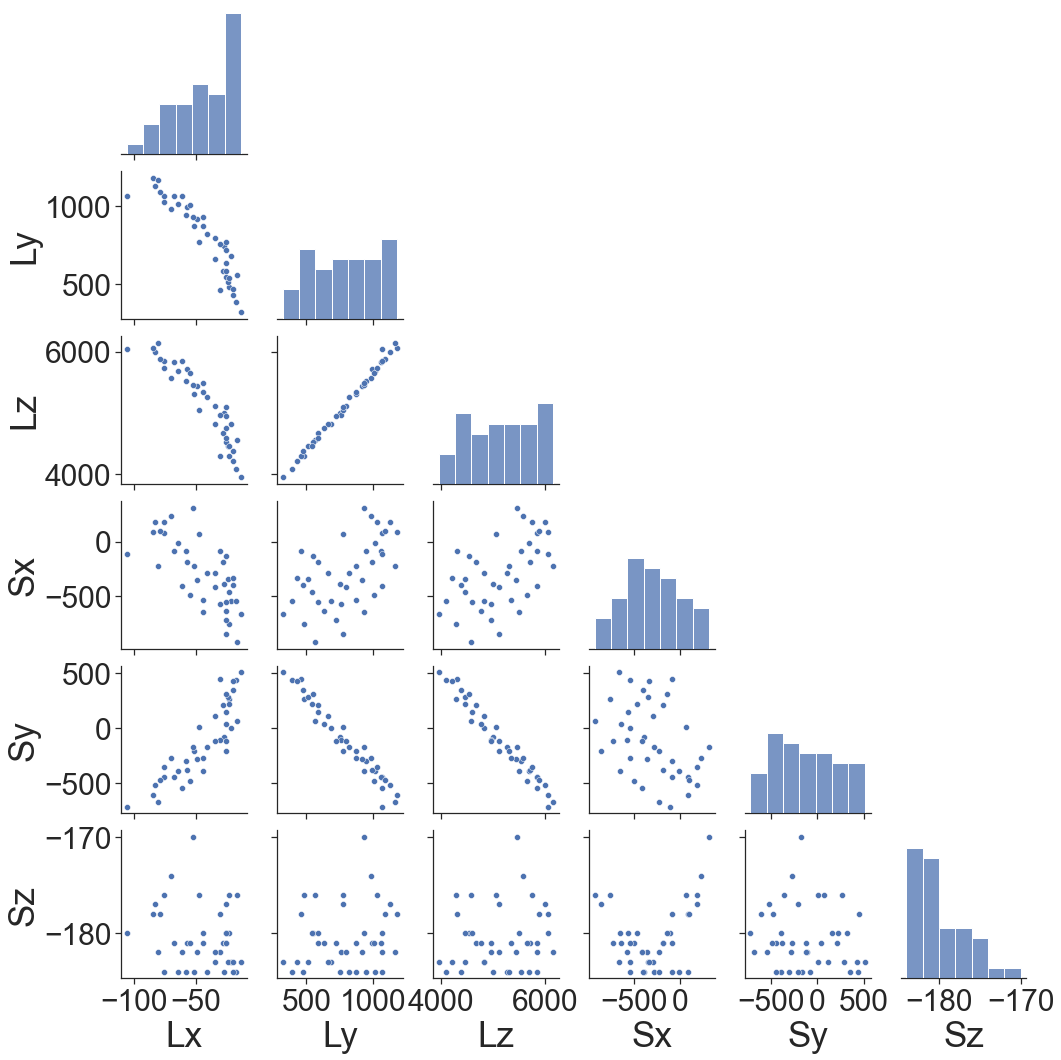

In [4]:
# Create a new figure
fig = plt.figure(facecolor='white')

sns.set(rc={'axes.labelsize': 35, 'xtick.labelsize': 30, 'ytick.labelsize': 30})  # Increase font size
sns.set_style("ticks")

# Create a pair plot
sns.pairplot(data=df2, corner=True)

# save the figure
plt.savefig('pairplot.png', bbox_inches='tight', dpi=300, facecolor='white')
plt.savefig('pairplot.svg', bbox_inches='tight', facecolor='white')
# Display the figure
plt.show()

We can see that, for example, the laser z (Lz) and laser y (Ly) are most tightly correlated. This is due to the angle of the mirror.

Microscope stage x (Sx) and microscope stage y (Sy) are completely uncorrelated, by definition. There may be some correlation in the pattern of points because of non-random human sampling. However, we can recognize this pattern of points as a pattern that is perfectly uncorrelated by definition.

From this insight, we can see that microscope stage x (Sx) is not (or minimally) correlated with any of the laser stage positions. This is because the mirror is symmetric along the microscope stage x axis and moving along x has a negligible effect.

We have removed the defocused values from the dataset previously so all microscope stage z (Sz) values represent variation in sample height. This is a fairly small spread (15 $\mu m$) and the uncertainty in the laser positioning is larger (as we will show next) so we gain little insight from this.

The major set of correlations that we are interested in are those between microscope stage y (Sy) and the laser stage values. Here we see strong linear correlations for each one. We want to examine these more closely. 

#### Residual Visualization

We want to be able to get a sense of the precision with which we can position the laser stage relative to the microscope stage. To do this we fit a line to the data and then plot the residuals.

If we have known values from the microscope stage, we would like to be able to predict values for the laser stage and position the laser properly. The plot of the residuals will give us a measure of how accurate we can expect this procedure to be.

/home/o2d/anaconda3/envs/ai/lib/python3.9/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/home/o2d/anaconda3/envs/ai/lib/python3.9/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
/home/o2d/anaconda3/envs/ai/lib/python3.9/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


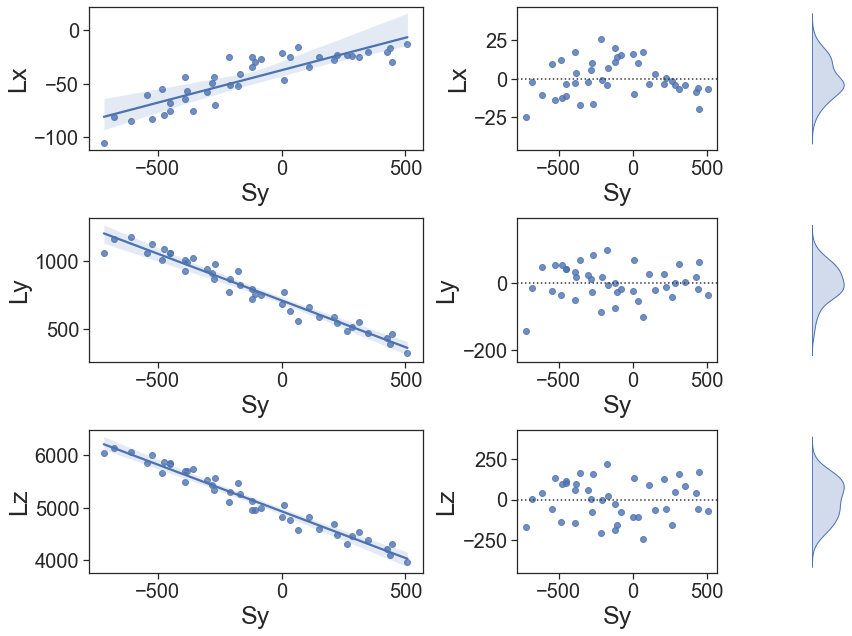

In [76]:
# List of variables
variables = ['Lx', 'Ly', 'Lz']

sns.set(rc={'axes.labelsize': 25, 'xtick.labelsize': 20, 'ytick.labelsize': 20})  # Increase font size
sns.set_style("ticks")
# Create a new figure
fig = plt.figure(figsize=(12, 3 * len(variables)))

# Create a grid of subplots
gs = fig.add_gridspec(len(variables), 3, width_ratios=[10, 6, 1])

# Loop over the variables
for i, var in enumerate(variables):
    # Calculate the residuals
    model = np.polyfit(df_filtered['Sy'], df_filtered[var], 1)
    predicted = np.polyval(model, df_filtered['Sy'])
    residuals = df_filtered[var] - predicted

    # Create a regplot in the left subplot
    ax_reg = fig.add_subplot(gs[i, 0])
    sns.regplot(data=df_filtered, x='Sy', y=var, ax=ax_reg, ci=100)

    # Create a residplot in the middle subplot
    ax_resid = fig.add_subplot(gs[i, 1])
    sns.residplot(data=df_filtered, x='Sy', y=var, ax=ax_resid)

    # Create a KDE plot in the right subplot
    ax_kde = fig.add_subplot(gs[i, 2], sharey=ax_resid)
    sns.kdeplot(residuals, ax=ax_kde, vertical=True, fill=True)

    # Remove axes and labels for the KDE plot
    ax_kde.set_axis_off()

plt.tight_layout()

# Save the figure
plt.savefig('residuals.png', bbox_inches='tight', dpi=300, facecolor='white')
plt.savefig('residuals.svg', bbox_inches='tight', facecolor='white')

plt.show()

Based on this information we can expect to be on the order of $\pm 20 \mu m$ for the laser stage x value, $\pm 100 \mu m$ for the laser stage y value, and $\pm 200 \mu m$ for the laser stage z value. In reality, the laser stage x value should be about as uncertain as the laser stage y value, but because the position of the e-beam does not change, the laser stage x position (in a perfect world) should also not change. Thus, we are very likely getting an under-estimate of the uncertainty in laser stage x because it is sampling the same position repeatedly. 

#### Finding the Transformation Matrix

We want to use the data to find a transformation matrix that will allow us to calculate laser stage values given microscope stage values. Let

- $L_n$ be the laser stage $n$ position, where $n$ is either $x$, $y$, or $z$

and likewise let

- $S_m$ be the microscope stage $m$ position, where $m$ is either $x$, $y$, or $z$.

We assume there is a linear relationship ($T_{nm}$) between the two so that we have

$$
L_x = T_{xx} S_x + T_{xy} S_y + T_{xz} S_z + C_x\\
L_y = T_{yx} S_x + T_{yy} S_y + T_{yz} S_z + C_y\\
L_z = T_{zx} S_x + T_{zy} S_y + T_{zz} S_z + C_z
$$

where $C_i$ represents a constant offset.

We can recast this in matrix form as follows

$$
{\begin{array}{cccc}
[L_x & L_y & L_z] = 
\end{array}}

\left[
{\begin{array}{cccc}
T_{xx} & T_{xy} & T_{xz}\\
T_{yx} & T_{yy} & T_{yz}\\
T_{zx} & T_{zy} & T_{zz}
\end{array}}
\right]

\left[
{\begin{array}{c}
S_x \\
S_y \\
S_z 
\end{array}}
\right]

+

\left[
    {\begin{array}{c}
    C_x \\
    C_y \\
    C_z
    \end{array}}
\right]
$$

or more compactly as simply

$$
L=TS + C
$$

What we want to do is fit an equation of this form to our data so that we can get the best approximation for laser positions from new microscope stage values.

In [70]:
# get the laser stage positions
L = np.array(df2[['Lx', 'Ly', 'Lz']])#.T

# get the microscope stage positions
S = np.array(df2[['Sx', 'Sy', 'Sz']])#.T


In [71]:
# Define our function
def my_func(data, Txx,Txy,Txz,Tyx,Tyy,Tyz,Tzx,Tzy,Tzz,Cx,Cy,Cz ):
    # Define a fitting function
    _S = data.reshape((-1,3))
    _T =np.asarray([
        [Txx,Txy,Txz],
        [Tyx,Tyy,Tyz],
        [Tzx,Tzy,Tzz]],dtype=float)
    _C = np.asarray([[Cx],
                    [Cy],
                    [Cz]])
    _L = _T@_S.T+_C
    return(_L.flatten())

# Perform the fit
popt, pcov = curve_fit(my_func, S, L.T.flatten())

print(popt.reshape((-1,3)))

[[-3.28314270e-02  4.93223034e-02  3.02014762e-02]
 [ 1.54275674e-01 -6.35942789e-01  2.77995885e-01]
 [ 3.98855614e-01 -1.64614607e+00 -2.51982628e+00]
 [-4.31178008e+01  8.13809556e+02  4.61258238e+03]]


Now, we want to make sure we did what we think we did.

In [72]:
# this uses the microscope stage data and predicts what the laser stage values should be
for i in range(len(df2)):
    x = df2.iloc[i].Sx
    y = df2.iloc[i].Sy
    z = df2.iloc[i].Sz
    S = np.array([x, y, z]) # this assembles the microscope x,y,z stage values

    # he we predict laser stage values
    if i == 0:
        out = my_func(S,*popt)
    else:
        _tmp = my_func(S,*popt)
        out = np.vstack((out, _tmp))


# put into a dataframe
out = pd.DataFrame(out, columns=['Pred_x', 'Pred_y', 'Pred_z'])

# add to the main dataframe
pred_df = pd.concat([df2.reset_index(), out], axis=1)

Plot a comparison between the original microscope stage data and the predicted laser positions.

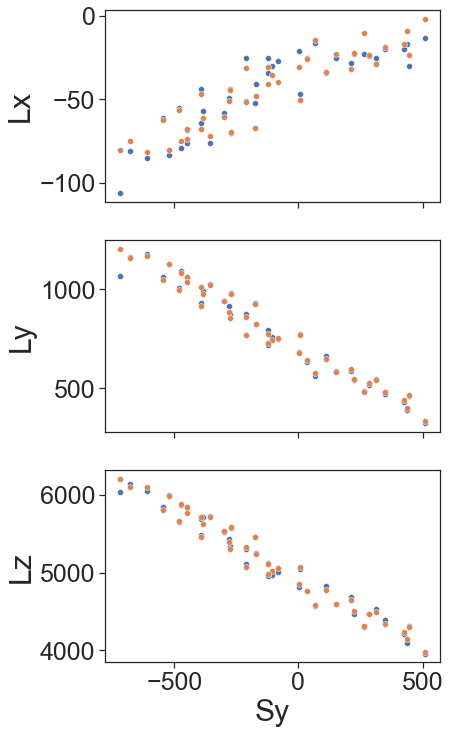

In [75]:
# plot the main three plots we want to check
sns.set(rc={'axes.labelsize': 30, 'xtick.labelsize': 25, 'ytick.labelsize': 25})  # Increase font size
sns.set_style("ticks")
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(6,12), sharex=True)
sns.scatterplot(data=pred_df, x='Sy', y='Lx', ax=ax[0])
sns.scatterplot(data=pred_df, x='Sy', y='Pred_x', ax=ax[0])

sns.scatterplot(data=pred_df, x='Sy', y='Ly', ax=ax[1])
sns.scatterplot(data=pred_df, x='Sy', y='Pred_y', ax=ax[1])

sns.scatterplot(data=pred_df, x='Sy', y='Lz', ax=ax[2])
sns.scatterplot(data=pred_df, x='Sy', y='Pred_z', ax=ax[2])

# Save the figure
plt.savefig('predictions.png', bbox_inches='tight', dpi=300, facecolor='white')
plt.savefig('predictions.svg', bbox_inches='tight', facecolor='white')

plt.show()


We can see that we get back roughly what we had, so our transformation matrix is working!

In [35]:
pred_df

,index,Lx,Ly,Lz,Sx,Sy,Sz,Pred_x,Pred_y,Pred_z
0,0,-21,684,4820,-545,3,-183,-41.796062,765.611597,5071.765978
1,1,-27,748,5002,-393,-83,-184,-46.587061,797.025467,5174.097999
2,3,-41,822,5256,-286,-170,-184,-52.807238,852.250536,5317.563653
3,5,-51,873,5305,-224,-210,-184,-47.786938,837.401714,5231.721815
4,7,-58,942,5526,-88,-301,-184,-30.882858,707.748531,4870.208457
5,9,-64,1012,5692,-15,-392,-184,-38.058846,734.194750,4988.896742
6,11,-76,1062,5847,82,-449,-184,-46.755072,775.213255,5156.836160
7,13,-83,1125,6000,182,-523,-177,-51.946518,849.837269,5307.738026
8,15,-85,1178,6056,91,-609,-178,-47.470085,837.614730,5227.030470
9,17,-68,1061,5835,-88,-449,-181,-36.684254,743.323143,4983.540443


In [36]:
df2

,Lx,Ly,Lz,Sx,Sy,Sz
0,-21,684,4820,-545,3,-183
1,-27,748,5002,-393,-83,-184
3,-41,822,5256,-286,-170,-184
5,-51,873,5305,-224,-210,-184
7,-58,942,5526,-88,-301,-184
9,-64,1012,5692,-15,-392,-184
11,-76,1062,5847,82,-449,-184
13,-83,1125,6000,182,-523,-177
15,-85,1178,6056,91,-609,-178
17,-68,1061,5835,-88,-449,-181
